# Data

In [15]:
import pandas as pd

# Load the datasets
cell_body_data_path = 'C:/Users/Urban/Desktop/Cell data/cell_body_data.csv'
nucleus_data_path = 'C:/Users/Urban/Desktop/Cell data/nucleus_data.csv'

cell_body_data = pd.read_csv(cell_body_data_path)
nucleus_data = pd.read_csv(nucleus_data_path)

# Remove the first row of each dataset
cell_body_data = cell_body_data.iloc[1:]
nucleus_data = nucleus_data.iloc[1:]

# Rename the columns
new_column_names = ["ID", "Index", "Area", "Filename", "Intensity_Ch1_T1_mean", "Intensity_Ch1_T2_mean", "Intensity_Ch2_T2_mean", "Pixel_Count"]
cell_body_data.columns = new_column_names
nucleus_data.columns = new_column_names

# Convert relevant columns to numeric
cols_to_convert = ["ID", "Index", "Area", "Intensity_Ch1_T1_mean", "Intensity_Ch1_T2_mean", "Intensity_Ch2_T2_mean", "Pixel_Count"]
cell_body_data[cols_to_convert] = cell_body_data[cols_to_convert].apply(pd.to_numeric, errors='coerce')
nucleus_data[cols_to_convert] = nucleus_data[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Convert Area from square nanometers to square micrometers
cell_body_data['Area'] = cell_body_data['Area'] / 1e6
nucleus_data['Area'] = nucleus_data['Area'] / 1e6

# Identify and remove observations with multiple nuclei
multi_nuclei_observations = nucleus_data['Filename'].value_counts()[nucleus_data['Filename'].value_counts() > 1].index
cell_body_data_cleaned = cell_body_data[~cell_body_data['Filename'].isin(multi_nuclei_observations)]
nucleus_data_cleaned = nucleus_data[~nucleus_data['Filename'].isin(multi_nuclei_observations)]

# Group and normalize cell body data
cell_body_data_grouped_corrected = cell_body_data_cleaned.groupby('Filename').agg({
    'ID': 'first',
    'Index': 'first',
    'Area': 'first',
    'Intensity_Ch1_T1_mean': 'first',
    'Intensity_Ch1_T2_mean': 'first',
    'Intensity_Ch2_T2_mean': 'mean',
    'Pixel_Count': 'sum'
}).reset_index()

# Group nucleus data
nucleus_data_grouped = nucleus_data_cleaned.groupby('Filename').agg({
    'ID': 'first',
    'Index': 'first',
    'Area': 'first',
    'Intensity_Ch1_T1_mean': 'first',
    'Intensity_Ch1_T2_mean': 'first',
    'Intensity_Ch2_T2_mean': 'first',
    'Pixel_Count': 'first'
}).reset_index()

# Merge the datasets
merged_data_corrected = pd.merge(cell_body_data_grouped_corrected, nucleus_data_grouped, on='Filename', suffixes=('_cell_body', '_nucleus'))

# Calculate the intensity ratio
merged_data_corrected['Intensity_Ratio_Ch2_T2'] = merged_data_corrected['Intensity_Ch2_T2_mean_nucleus'] / merged_data_corrected['Intensity_Ch2_T2_mean_cell_body']

# Add pixel count ratio
merged_data_corrected['Pixel_Count_Ratio'] = merged_data_corrected['Pixel_Count_nucleus'] / merged_data_corrected['Pixel_Count_cell_body']

# Write the merged dataframe to a .csv and .xlsx file
merged_data_corrected.to_csv('C:/Users/Urban/Desktop/Cell data/merged_data_corrected_csv.csv', index=False)
merged_data_corrected.to_excel('C:/Users/Urban/Desktop/Cell data/merged_data_corrected_xlsx.xlsx', index=False)

# Create new dataframe containing only ['Filename', 'ID', 'Area', 'Intensity_Ch2_T2_mean', 'Pixel_count'], for both cell_body and nucleus
columns_to_keep = ['Filename', 'Area_cell_body', 'Intensity_Ch2_T2_mean_cell_body', 'Pixel_Count_cell_body', 'Area_nucleus', 'Intensity_Ch2_T2_mean_nucleus', 'Pixel_Count_nucleus', 'Intensity_Ratio_Ch2_T2','Pixel_Count_Ratio']
subset_merged_df = merged_data_corrected[columns_to_keep]

# Rename the columns to be more descriptive for easier analysis
subset_merged_df.columns = ['Filename', 'Area_cb [μm²]', 'TDP43_Int_CB', 'PC_CB [pixel²]',
                              'Area_nuc [μm²]', 'TDP43_Int_Nuc', 'PC_nuc [pixel²]', 'TDP43_Ratio_N/C', 'Pixel_Ratio_NC']

# Remove the string "Create Image Subset" from the 'Filename' column
subset_merged_df.loc[:, 'Filename'] = subset_merged_df['Filename'].str.replace('-Create Image Subset', '')

# Strip any leading or trailing whitespace from the filenames
subset_merged_df.loc[:, 'Filename'] = subset_merged_df['Filename'].str.strip()

# Display dataframe (optional)
display(subset_merged_df, subset_merged_df.shape)

# Write subset_merged_df as .csv and .xlsx
#subset_merged_df.to_csv('C:/Users/Urban/Desktop/Cell data/subset_merged_df_csv.csv', index=False)
#subset_merged_df.to_excel('C:/Users/Urban/Desktop/Cell data/subset_merged_df_xlsx.xlsx', index=False)

,Filename,Area_cb [μm²],TDP43_Int_CB,PC_CB [pixel²],Area_nuc [μm²],TDP43_Int_Nuc,PC_nuc [pixel²],TDP43_Ratio_N/C,Pixel_Ratio_NC
0,cell_31.czi,55.010334,1961.282491,10695,170.038604,5292.551932,6961,2.698516,0.650865
1,cell_32.czi,63.217915,1457.706337,2588,136.157905,4981.557768,5574,3.417395,2.153787
2,cell_34.czi,38.570745,1591.295123,1579,111.584017,5955.084501,4568,3.742288,2.892970
3,cell_35.czi,17.441109,1717.241355,12716,191.583504,5115.592120,7843,2.978959,0.616782
4,cell_37.czi,347.967233,1934.160899,14245,181.690437,7868.087389,7438,4.067959,0.522148
5,cell_41.czi,59.138552,1641.473564,3435,134.667838,5396.932160,5513,3.287858,1.604949
6,cell_42.czi,513.120372,14841.026802,21006,620.356325,9858.118877,25396,0.664248,1.208988
7,cell_44.czi,295.790469,12594.167066,12109,305.023997,8480.699688,12487,0.673383,1.031216
8,cell_45.czi,236.749626,12371.013413,9692,265.573869,7724.452907,10872,0.624399,1.121750
9,cell_46.czi,41.062332,9220.493268,4675,214.716180,11369.788055,8790,1.233100,1.880214


(37, 9)

# Writing tables

In [3]:
# Cell_body_data
cell_body_data_cleaned.to_excel('C:/Users/Urban/Desktop/Cell data/Tables/cell_body_data_cleaned_xlsx.xlsx', index=False)
cell_body_data.to_excel('C:/Users/Urban/Desktop/Cell data/Tables/cell_body_data_xlsx.xlsx', index=False)

# Nucleus_data
nucleus_data_cleaned.to_excel('C:/Users/Urban/Desktop/Cell data/Tables/nucleus_data_cleaned_xlsx.xlsx', index=False)
nucleus_data.to_excel('C:/Users/Urban/Desktop/Cell data/Tables/nucleus_data_xlsx.xlsx')

# Plots

### Post processing figures

#### Pixel count Cell_body

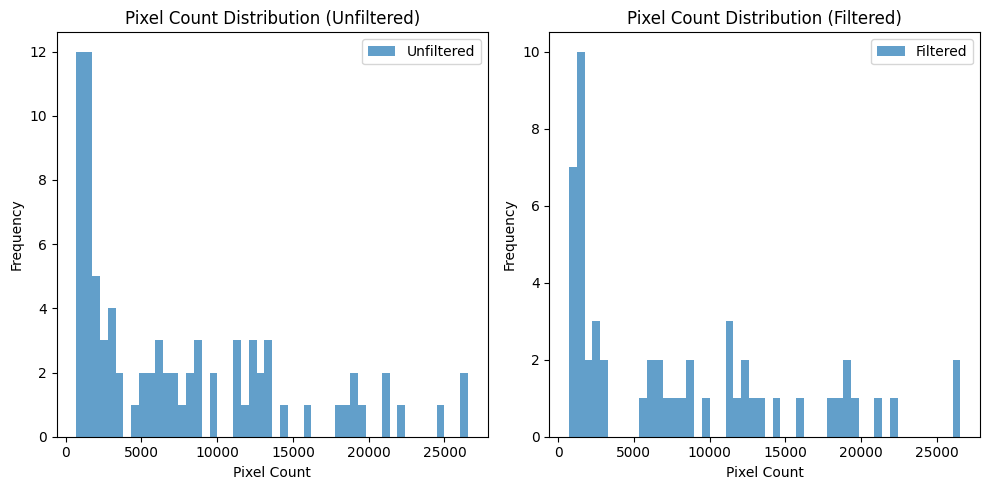

In [4]:
import matplotlib.pyplot as plt

# Plot pixel count distribution before filtering
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(cell_body_data['Pixel_Count'].dropna(), bins=50, alpha=0.7, label='Unfiltered')
plt.xlabel('Pixel Count')
plt.ylabel('Frequency')
plt.title('Pixel Count Distribution (Unfiltered)')
plt.legend()

# Plot pixel count distribution after filtering
plt.subplot(1, 2, 2)
plt.hist(cell_body_data_cleaned['Pixel_Count'].dropna(), bins=50, alpha=0.7, label='Filtered')
plt.xlabel('Pixel Count')
plt.ylabel('Frequency')
plt.title('Pixel Count Distribution (Filtered)')
plt.legend()


plt.tight_layout()
plt.savefig('C:/Users/Urban/Desktop/Cell data/Figures/Pixel_count_fig.jpg')

plt.show()

#### Pixel count nuclei

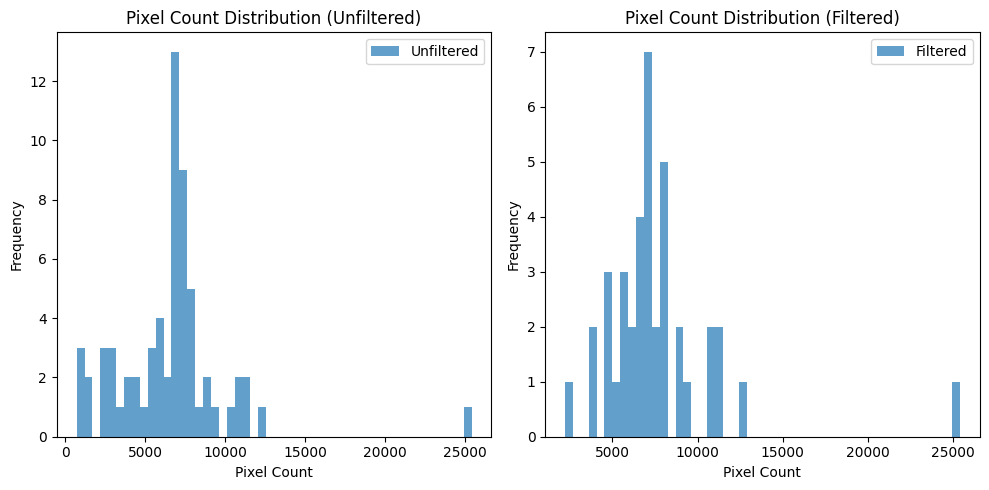

In [5]:
import matplotlib.pyplot as plt

# Plot pixel count distribution before filtering
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(nucleus_data['Pixel_Count'].dropna(), bins=50, alpha=0.7, label='Unfiltered')
plt.xlabel('Pixel Count')
plt.ylabel('Frequency')
plt.title('Pixel Count Distribution (Unfiltered)')
plt.legend()

# Plot pixel count distribution after filtering
plt.subplot(1, 2, 2)
plt.hist(nucleus_data_cleaned['Pixel_Count'].dropna(), bins=50, alpha=0.7, label='Filtered')
plt.xlabel('Pixel Count')
plt.ylabel('Frequency')
plt.title('Pixel Count Distribution (Filtered)')
plt.legend()


plt.tight_layout()
plt.savefig('C:/Users/Urban/Desktop/Cell data/Figures/Pixel_count_fig.jpg')

plt.show()

#### intensity cell_body

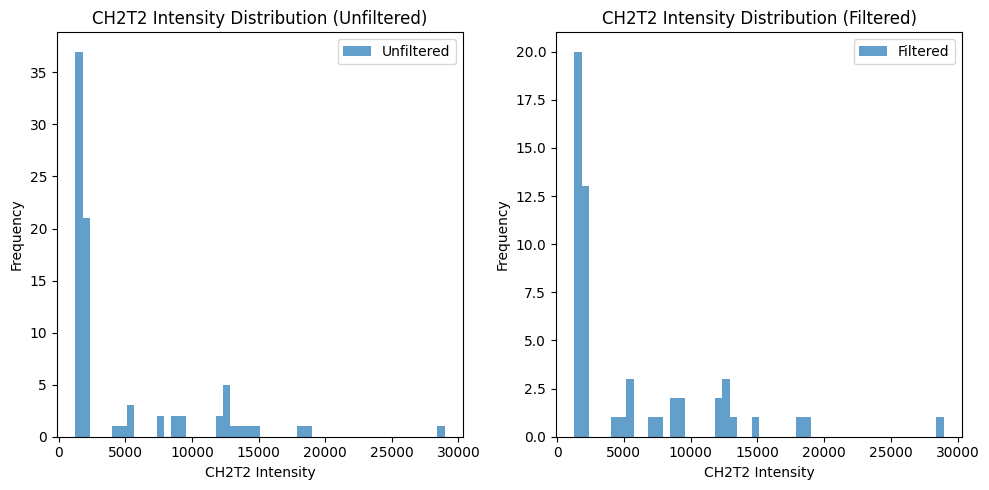

In [6]:
# Compare CH2T2 intensity before and after filtering
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(cell_body_data['Intensity_Ch2_T2_mean'].dropna(), bins=50, alpha=0.7, label='Unfiltered')
plt.xlabel('CH2T2 Intensity')
plt.ylabel('Frequency')
plt.title('CH2T2 Intensity Distribution (Unfiltered)')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(cell_body_data_cleaned['Intensity_Ch2_T2_mean'].dropna(), bins=50, alpha=0.7, label='Filtered')
plt.xlabel('CH2T2 Intensity')
plt.ylabel('Frequency')
plt.title('CH2T2 Intensity Distribution (Filtered)')
plt.legend()

plt.tight_layout()
plt.savefig('C:/Users/Urban/Desktop/Cell data/Figures/CH2T2_int_dist_fig_cell_body.jpg')

plt.show()

#### Intensity nuclei

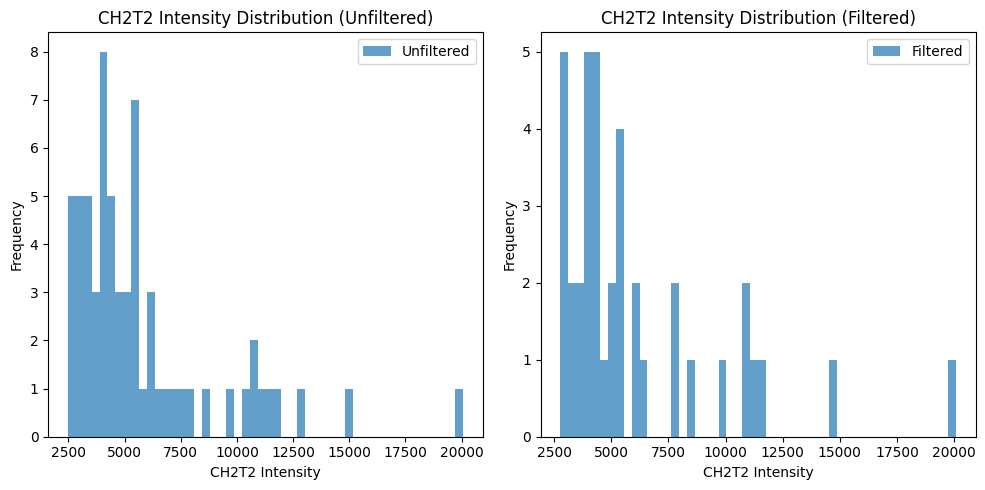

In [7]:
# Compare CH2T2 intensity before and after filtering
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(nucleus_data['Intensity_Ch2_T2_mean'].dropna(), bins=50, alpha=0.7, label='Unfiltered')
plt.xlabel('CH2T2 Intensity')
plt.ylabel('Frequency')
plt.title('CH2T2 Intensity Distribution (Unfiltered)')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(nucleus_data_cleaned['Intensity_Ch2_T2_mean'].dropna(), bins=50, alpha=0.7, label='Filtered')
plt.xlabel('CH2T2 Intensity')
plt.ylabel('Frequency')
plt.title('CH2T2 Intensity Distribution (Filtered)')
plt.legend()

plt.tight_layout()
plt.savefig('C:/Users/Urban/Desktop/Cell data/Figures/CH2T2_int_dist_fig_nuc.jpg')

plt.show()

### Interpretation figures

#### Bar chart for location comparison

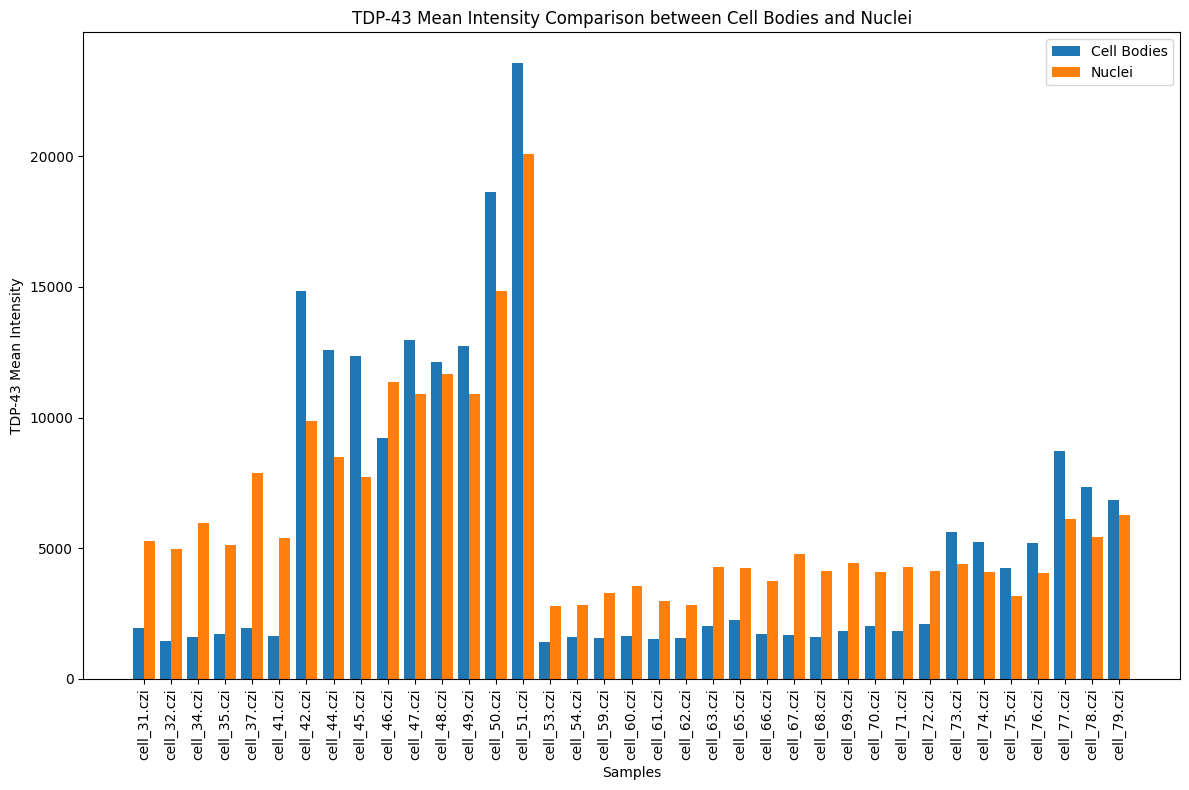

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is already loaded into a pandas DataFrame
# Bar Charts: TDP-43 Mean Intensity Comparison

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the bar chart
width = 0.4
indices = range(len(subset_merged_df))
bar1 = ax.bar(indices, subset_merged_df['TDP43_Int_CB'], width, label='Cell Bodies')
bar2 = ax.bar([i + width for i in indices], subset_merged_df['TDP43_Int_Nuc'], width, label='Nuclei')

# Set labels and title
ax.set_xlabel('Samples')
ax.set_ylabel('TDP-43 Mean Intensity')
ax.set_title('TDP-43 Mean Intensity Comparison between Cell Bodies and Nuclei')
ax.set_xticks([i + width / 2 for i in indices])
ax.set_xticklabels(subset_merged_df['Filename'], rotation=90)
ax.legend()

# Show the plot
plt.tight_layout()
plt.savefig('C:/Users/Urban/Desktop/Cell data/Figures/TDP-43_int_comp.jpg')

plt.show()

#### Scatterplot: Relationship between area an intensity

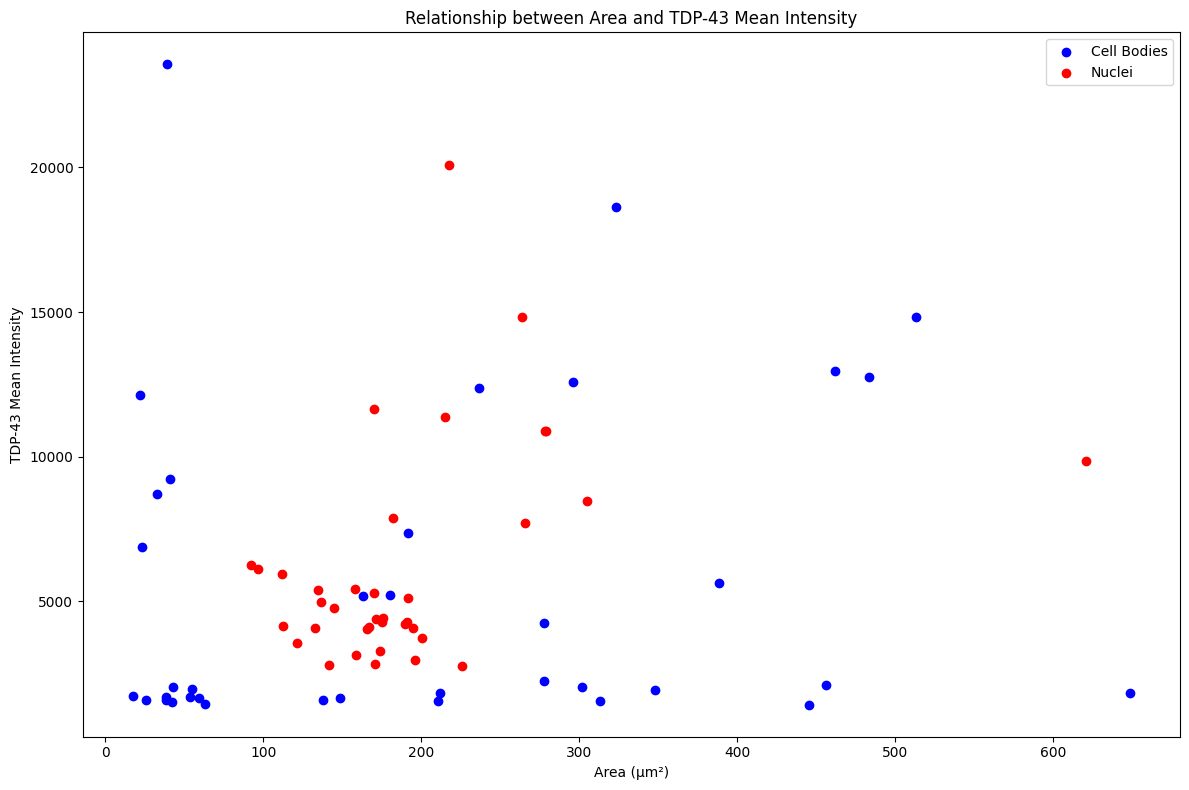

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is already loaded into a pandas DataFrame
# Scatter Plot: Relationship between Area and TDP-43 Mean Intensity

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the scatter plot for cell bodies
scatter1 = ax.scatter(subset_merged_df['Area_cb [μm²]'], subset_merged_df['TDP43_Int_CB'], color='blue', label='Cell Bodies')

# Plot the scatter plot for nuclei
scatter2 = ax.scatter(subset_merged_df['Area_nuc [μm²]'], subset_merged_df['TDP43_Int_Nuc'], color='red', label='Nuclei')

# Set labels and title
ax.set_xlabel('Area (μm²)')
ax.set_ylabel('TDP-43 Mean Intensity')
ax.set_title('Relationship between Area and TDP-43 Mean Intensity')
ax.legend()

# Set x-axis to scientific notation for clarity
ax.ticklabel_format(style='plain', axis='x', scilimits=(0,0))

# Show the plot
plt.tight_layout()
plt.savefig('C:/Users/Urban/Desktop/Cell data/Figures/area_vs_int_scatter.jpg')

plt.show()

#### Pie chart (__*not sure if this will be used*__)

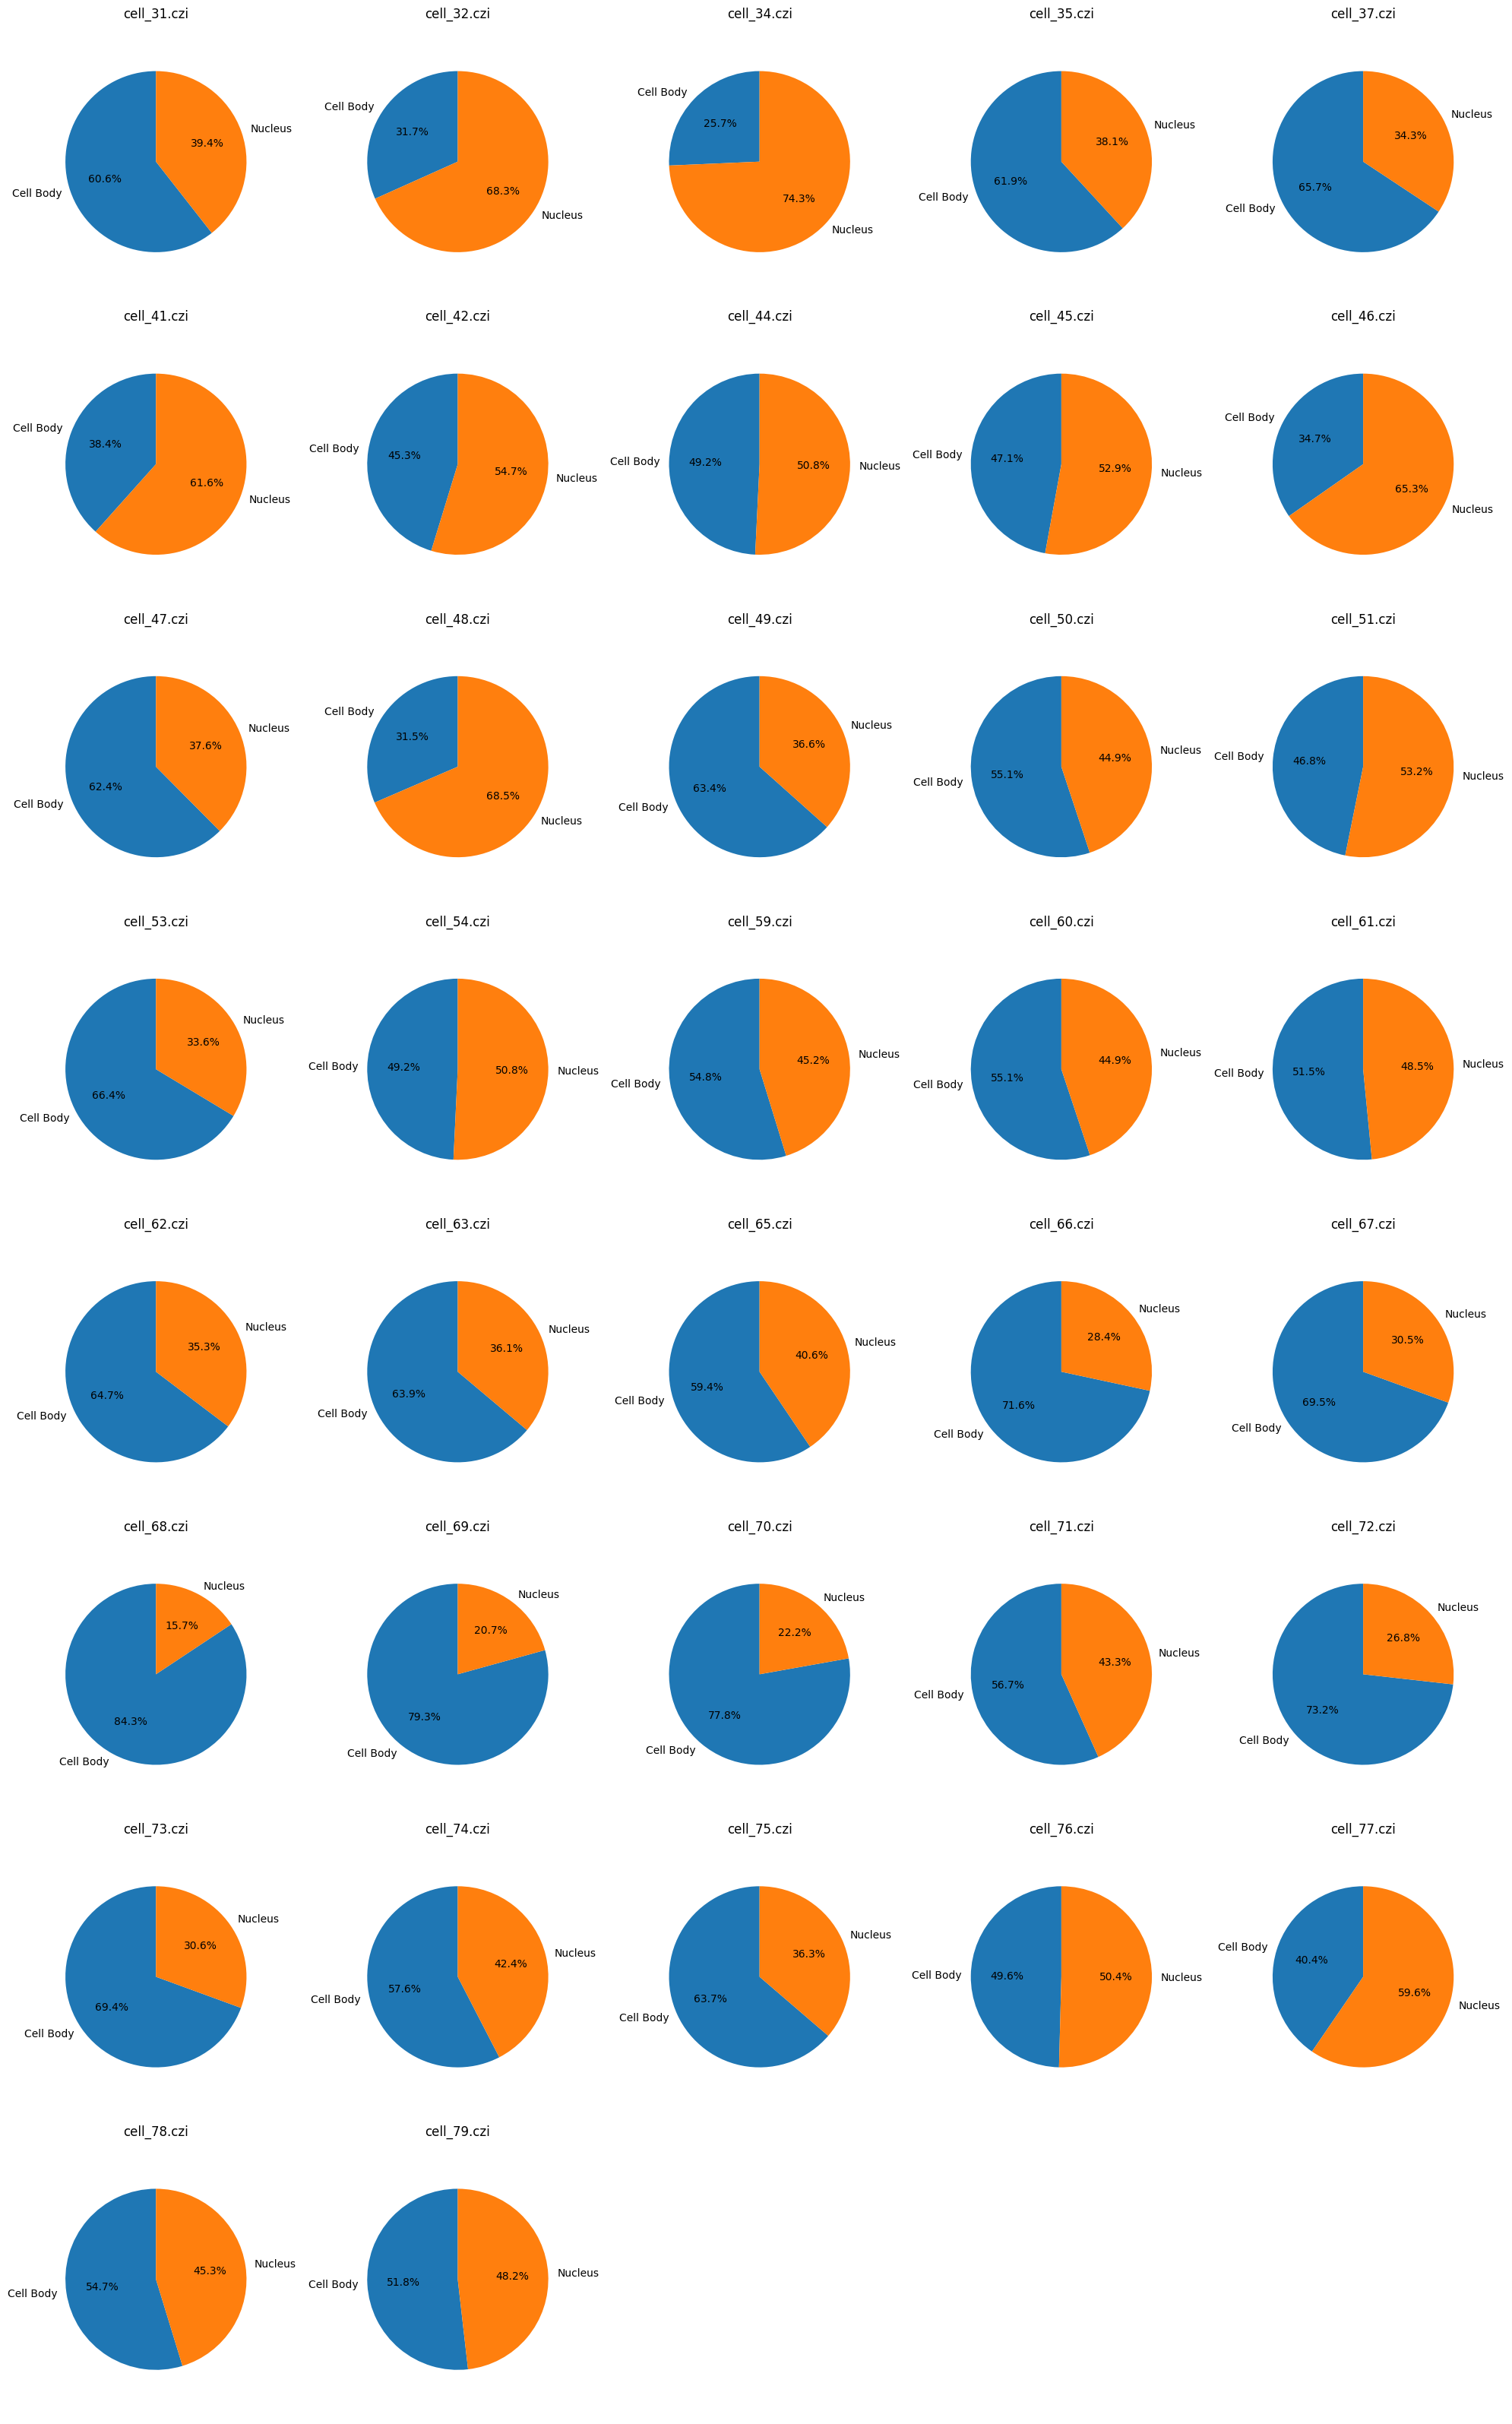

In [11]:
import matplotlib.pyplot as plt

# Improved Pie charts for Pixel Count Ratio
num_plots = len(subset_merged_df['Filename'])
cols = 5  # Number of columns
rows = (num_plots // cols) + (num_plots % cols > 0)  # Calculate rows needed

fig, axes = plt.subplots(rows, cols, figsize=(20, 4*rows))

for i, ax in enumerate(axes.flatten()):
    if i < num_plots:
        labels = 'Cell Body', 'Nucleus'
        sizes = [subset_merged_df.loc[i, 'PC_CB [pixel²]'], subset_merged_df.loc[i, 'PC_nuc [pixel²]']]
        ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
        ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        ax.set_title(subset_merged_df.loc[i, 'Filename'])
    else:
        ax.axis('off')  # Turn off the axis for empty subplots

plt.tight_layout()
plt.savefig('C:/Users/Urban/Desktop/Cell data/Figures/full_pie_chart.jpg')
plt.show()


#### Create dataframe for Claire

In [12]:
filelist = pd.read_csv('C:/Users/Urban/Desktop/Cell data/filelist.csv')
subset_2_col = subset_merged_df[['Filename', 'TDP43_Ratio_N/C']]
subset_2_col = subset_2_col.rename(columns={"Filename": 'Cell'})
parent_df = pd.merge(subset_2_col, filelist, on='Cell')

print(subset_2_col.shape, filelist.shape, concat_df.shape)

parent_df.to_excel('C:/Users/Urban/Desktop/Cell data/parent_df.xlsx', index=False)

NameError: name 'concat_df' is not defined

# Results

#### Initial Data and Filtering Process

The initial datasets comprised segmented images of cell bodies and nuclei. However, these datasets contained several inconsistencies and errors that necessitated a thorough filtering process. Specifically, some images processed by the neural network contained multiple nuclei or were split into multiple parts, leading to inaccurate and redundant observations.

**Unfiltered Data**

The raw data contained numerous entries where images had either multiple nuclei or were divided into several cell body segments. This redundancy was problematic for accurate analysis, particularly in determining the intensity of the CH2T2 channel across the entire cell body.

**Filtering Process**

To address these issues, the following steps were undertaken:
1. **Header Removal**: The first row, which contained a formatting error, was removed from each dataset.
2. **Column Renaming**: Columns were renamed for ease of reference and processing.
3. **Data Type Conversion**: Relevant columns were converted to numeric types to ensure proper calculations.
4. **Observation Removal**: Entries with multiple nuclei were identified and removed entirely from both datasets. This was necessary to prevent incorrect intensity readings and ensure each observation corresponded to a single cell.

Post-filtering, we were left with 29 observations. This reduction was primarily due to the elimination of images with multiple nuclei, which could not be reliably segmented into distinct, meaningful observations.

**Normalization and Aggregation**

For images with multiple cell body segments but only one nucleus, the intensity of the CH2T2 channel was averaged across the segments. This was feasible because the CH2T2 channel intensity remains relatively uniform throughout the cell body. Additionally, the pixel count was summed to reflect the total cell body area. This approach allowed us to retain observations where the neural network had incorrectly split a single cell body into multiple parts.

### Pixel Count

Pixel count is a crucial metric in our analysis as it represents the total number of pixels that make up the segmented cell body or nucleus in an image. This count is directly related to the area of the cell body or nucleus:
- **Total Area**: By summing the pixel counts of multiple segments of the same cell body, we obtain a more accurate representation of the cell's total area.
- **Accuracy in Representation**: Ensuring the pixel count is accurately calculated is vital for comparing different cells and for any subsequent intensity-related calculations.

In our filtering process, for entries with a single nucleus but multiple cell body segments, the total pixel count for the cell body was calculated by summing the pixel counts of all segments. This aggregation ensures that the entire cell body is considered, even if the neural network initially split it into parts. This method provides a more accurate measurement of the cell body area, which is essential for reliable intensity comparisons and other analyses.

### Visualizations of Pixel Count Distribution

To visualize the impact of the filtering process, we created histograms of the pixel count distribution before and after filtering:

```python
import matplotlib.pyplot as plt

# Plot pixel count distribution before filtering
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(cell_body_data['Pixel_Count'].dropna(), bins=50, alpha=0.7, label='Unfiltered')
plt.xlabel('Pixel Count')
plt.ylabel('Frequency')
plt.title('Pixel Count Distribution (Unfiltered)')
plt.legend()

# Plot pixel count distribution after filtering
plt.subplot(1, 2, 2)
plt.hist(cell_body_data_cleaned['Pixel_Count'].dropna(), bins=50, alpha=0.7, label='Filtered')
plt.xlabel('Pixel Count')
plt.ylabel('Frequency')
plt.title('Pixel Count Distribution (Filtered)')
plt.legend()

plt.tight_layout()
plt.show()
```

### CH2T2 Intensity

The CH2T2 channel intensity is a key metric for our analysis. The filtering and normalization processes ensured that the intensity values are accurate and comparable across different cells.

### Visualizations of CH2T2 Intensity

We also created histograms to compare the CH2T2 intensity distribution before and after filtering:

```python
# Compare CH2T2 intensity before and after filtering
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(cell_body_data['Intensity_Ch2_T2_mean'].dropna(), bins=50, alpha=0.7, label='Unfiltered')
plt.xlabel('CH2T2 Intensity')
plt.ylabel('Frequency')
plt.title('CH2T2 Intensity Distribution (Unfiltered)')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(cell_body_data_cleaned['Intensity_Ch2_T2_mean'].dropna(), bins=50, alpha=0.7, label='Filtered')
plt.xlabel('CH2T2 Intensity')
plt.ylabel('Frequency')
plt.title('CH2T2 Intensity Distribution (Filtered)')
plt.legend()

plt.tight_layout()
plt.show()
```

### Analysis of Pixel Count Distribution Before and After Filtering

**Unfiltered Data:**
- **Description**: The left histogram shows the pixel count distribution for cell bodies before filtering.
- **Observations**: 
  - There are several peaks across a wide range of pixel counts.
  - The highest frequency is observed at the lower end of the pixel count range, indicating many small segments.
  - There are also multiple higher pixel counts indicating larger cell bodies or multiple cells in the same image.

**Filtered Data:**
- **Description**: The right histogram shows the pixel count distribution for cell bodies after filtering.
- **Observations**:
  - The distribution has fewer peaks and is more concentrated at lower pixel counts.
  - The highest frequency is still at the lower end, but with a more consistent and uniform distribution.
  - Higher pixel counts are less frequent, indicating that filtering has removed many of the outliers and incorrect segmentations.

**Key Points:**
- **Filtering Effectiveness**: The filtering process has successfully removed outliers and inconsistent entries, leading to a more reliable dataset.
- **Improved Data Quality**: The more uniform pixel count distribution post-filtering suggests improved data quality, which is crucial for accurate downstream analysis.

### Analysis of CH2T2 Intensity Distribution Before and After Filtering

**Unfiltered Data:**
- **Description**: The left histogram shows the CH2T2 intensity distribution for cell bodies before filtering.
- **Observations**:
  - A broad range of intensity values indicates variability in the segmentation and measurement process.
  - The presence of outliers and a wider spread of intensity values suggests inconsistencies in the data, likely due to multiple cell parts and segmentation errors.

**Filtered Data:**
- **Description**: The right histogram shows the CH2T2 intensity distribution for cell bodies after filtering.
- **Observations**:
  - The distribution is more concentrated with fewer peaks.
  - The intensity values are more consistent, with the highest frequency still at the lower end but with reduced variability.

**Key Points:**
- **Normalization Effectiveness**: The filtering process has successfully normalized the intensity values, leading to a more consistent distribution.
- **Reduced Variability**: The narrower range of intensity values indicates improved consistency and reliability in the data.
- **Data Integrity**: The filtered data shows fewer extreme values, suggesting that the dataset now more accurately reflects the true CH2T2 intensity across cell bodies.

### Previous Approach

Initially, a different approach was employed where the data was sorted and filtered based on the largest area for nuclei and cell bodies with multiple entries. The observation with the highest area was retained. This method worked well for:
- Images with one nucleus and one cell body, as it correctly identified the most representative segment.
- Images with one nucleus but multiple cell body parts, as the intensity of the CH2T2 channel was consistent, and the largest part provided a good approximation.

However, this method encountered significant issues with images containing multiple nuclei and corresponding cell bodies. The mismatch between the largest nucleus of one cell and the largest cell body of another led to inaccurate pairings, which skewed the data analysis.

### Issues with Pixel Count

While the previous method addressed intensity consistency, it failed to account for the total pixel count accurately. Summing the pixel counts provided a more accurate representation of the cell body area, which was essential for our analysis. Without this summation, the true extent of the cell body might be underestimated, leading to potential errors in interpreting the intensity and area-related metrics.

### Optimal Data Preparation for Neural Networks

To achieve the best results when analyzing similar data, it is ideal to feed the neural network images containing only one cell per image. This approach ensures that the neural network can accurately segment and analyze each cell without the complications introduced by multiple cells in a single image. This also simplifies the post-processing steps, reducing the need for extensive filtering and aggregation to correct segmentation errors.

### Final Observations

**Revealing Insights from Filtered Data**

The filtered data reveals several important insights that were obscured in the unfiltered dataset:

1. **Consistency in Cell Body Size**: The more uniform pixel count distribution in the filtered data indicates that the entries now more accurately represent individual cell bodies. The removal of outliers and incorrectly segmented entries has resulted in a dataset that better reflects the true size distribution of cell bodies.

2. **Reliable CH2T2 Intensity Measurements**: The narrower range of CH2T2 intensity values in the filtered data suggests that the measurements are now more consistent across different cell bodies. This normalization is crucial for comparing intensity values and drawing meaningful biological conclusions.

3. **Improved Data Quality**: The filtering process has significantly enhanced the overall quality of the dataset by removing redundant and inconsistent observations. This improvement is evident in both the pixel count and CH2T2 intensity distributions.

4. **Foundation for Accurate Analysis**: With a cleaner and more representative dataset, subsequent analyses can be performed with greater confidence. The filtered data provides a solid foundation for studying the relationship between cell body size, CH2T2 intensity, and other biological